# 多层感知机的简洁实现
:label:`sec_mlp_concise`

正如你所期待的，我们可以(**通过高级API更简洁地实现多层感知机**)。


In [ ]:
pip install -U d2l

In [2]:
import torch
from torch import nn
from d2l import torch as d2l

## 模型

与softmax回归的简洁实现（:numref:`sec_softmax_concise`）相比，唯一的区别是我们添加了2个全连接层（之前我们只添加了1个全连接层）。第一层是[**隐藏层**]，它(**包含256个隐藏单元，并使用了ReLU激活函数**)。第二层是输出层。


In [34]:
# 这是个样例
# import torch.nn as nn
# @torch.no_grad()

# def init_weights(m):
#     print("m:", m)
#     print('1****')
#     if type(m) == nn.Linear:
#         m.weight.fill_(1.0)
#         print(m.weight)
#         print('1****1')
# net = nn.Sequential(nn.Linear(2,4), nn.Linear(4, 8))
# print(net)
# print('isinstance torch.nn.Module',isinstance(net,torch.nn.Module))
# print(' ')
# net.apply(init_weights);

Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): Linear(in_features=4, out_features=8, bias=True)
)
isinstance torch.nn.Module True
 
m: Linear(in_features=2, out_features=4, bias=True)
1****
Parameter containing:
tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]], requires_grad=True)
1****1
m: Linear(in_features=4, out_features=8, bias=True)
1****
Parameter containing:
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]], requires_grad=True)
1****1
m: Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): Linear(in_features=4, out_features=8, bias=True)
)
1****


In [35]:
# with torch.no_grad()或者@torch.no_grad()中的数据不需要计算梯度，也不会进行反向传播

# nn.Sequential() 一个顺序容器。模块将按照它们在构造函数中传递的顺序添加到其中
# nn.Flatten() 任何维度经过Flatten之后都是二维
# nn.Linear(784, 256) 隐藏层，nn.ReLU() Relu
# nn.Linear(256, 10)) 输出层
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 256), nn.ReLU(),
                    nn.Linear(256, 10))
# 将初始化函数传递给torch.nn.Module.apply。它将以nn.Module递归方式初始化整个权重
def init_weights(m):#初始化nn.Sequential里面的参数
    if type(m) == nn.Linear:
        # 把m的权重初始化 用正态分布中的值填充
        nn.init.normal_(m.weight, std=0.01)
# pytorch中的model.apply(fn)会递归地将函数fn应用到父模块的每个子模块submodule，
# 也包括model这个父模块自身
print(net)
net.apply(init_weights);#先递归子模块，再递归父模块
# 讲解net.apply(fn)
# https://blog.csdn.net/qq_37025073/article/details/106739513

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=10, bias=True)
)


[**训练过程**]的实现与我们实现softmax回归时完全相同，这种模块化设计使我们能够将与和模型架构有关的内容独立出来。


In [36]:
batch_size, lr, num_epochs = 256, 0.1, 10
loss = nn.CrossEntropyLoss()
trainer = torch.optim.SGD(net.parameters(), lr=lr)

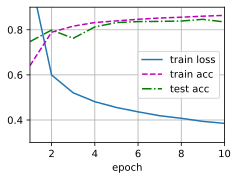

In [37]:
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

## 小结

* 我们可以使用高级API更简洁地实现多层感知机。
* 对于相同的分类问题，多层感知机的实现与softmax回归的实现相同，只是多层感知机的实现里增加了带有激活函数的隐藏层。

## 练习

1. 尝试添加不同数量的隐藏层（也可以修改学习率）。怎么样设置效果最好？
1. 尝试不同的激活函数。哪个效果最好？
1. 尝试不同的方案来初始化权重。什么方法效果最好？


[Discussions](https://discuss.d2l.ai/t/1802)
